In [21]:
# Write a program to implement the A* algorithm for finding the shortest path from a source node to a
# destination node in a weighted graph.

In [22]:
# define the graph
graph = {
    0: {1: 4, 2: 2},
    1: {2:5, 3:10},
    2: {1: 1,3: 2},
    3: {0: 8, 3: 3}
}

# define the heuristic function
heuristic = {
    0: 9,
    1: 7,
    2: 0,
    3: 2
}

In [23]:
# define the A* algorithm
def a_star(graph, heuristic, start, end):
    # initialize the open and closed list
    open_list = set([start])
    closed_list = set([])
    
    # initialize the g and f value
    g = {}
    f = {}
    
    g[start] = 0
    f[start] = heuristic[start]
    
    # initialize the parent
    parent = {}
    parent[start] = start
    
    # loop until the open list is empty
    while len(open_list) > 0:
        n = None
        
        # find a node with the lowest f value
        for v in open_list:
            if n == None or f[v] < f[n]:
                n = v
        
        # if the current node is the end node, return the path
        if n == end:
            path = []
            
            while parent[n] != n:
                path.append(n)
                n = parent[n]
                
            path.append(n)
            
            path.reverse()
            
            return path
        
        # loop through the node's children/siblings
        for (m, weight) in graph[n].items():
            # if the child node is in the closed list, skip it
            if m in closed_list:
                continue
            
            # otherwise, calculate the g, f value
            g_new = g[n] + weight
            f_new = g_new + heuristic[m]
            
            # if the child node is in the open list
            if m in open_list:
                # check if the current path is better than the previous one
                if g_new < g[m]:
                    # update the g and f value
                    g[m] = g_new
                    f[m] = f_new
                    
                    # update the parent
                    parent[m] = n
            else:
                # add the child node to the open list
                open_list.add(m)
                
                # update the g and f value
                g[m] = g_new
                f[m] = f_new
                
                # update the parent
                parent[m] = n
        
        # remove the current node from the open list and add it to the closed list
        open_list.remove(n)
        closed_list.add(n)
        
    # if the open list is empty, return None
    return None

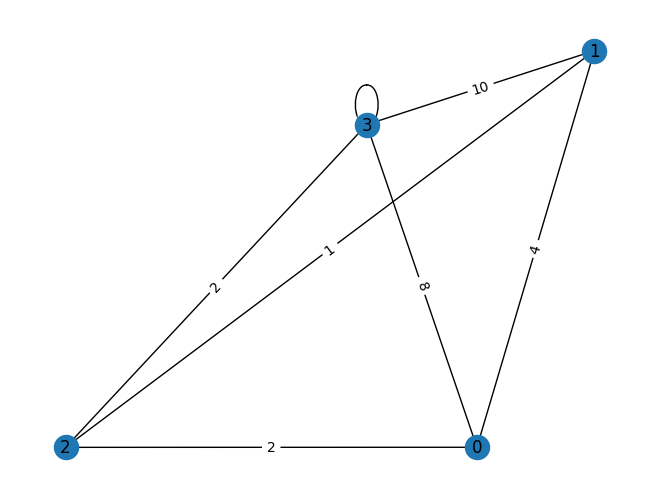

In [24]:
# draw the graph
def draw_graph(graph):
    # import the necessary packages
    import networkx as nx
    import matplotlib.pyplot as plt
    
    # create a graph
    G = nx.Graph()
    
    # add the edges
    for node in graph:
        for neighbour in graph[node]:
            G.add_edge(node, neighbour, weight = graph[node][neighbour])
    
    # draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
    plt.show()

# draw the graph
draw_graph(graph)

In [25]:
# test the A* algorithm
print(a_star(graph, heuristic, 0, 3))

[0, 2, 3]


In [26]:
# test the A* algorithm
print(a_star(graph, heuristic, 0, 2))

[0, 2]


In [27]:
# test the A* algorithm
print(a_star(graph, heuristic, 1, 3))

[1, 2, 3]
